<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2015%EC%9D%BC/12%EC%9B%94_15%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

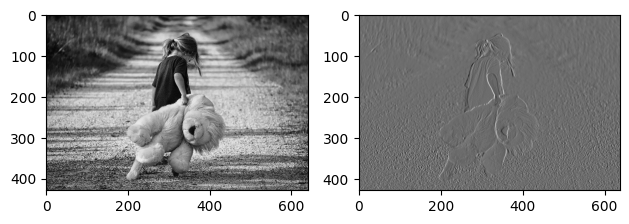

In [ ]:
# 원본 이미지에 대해 convolution 연산을 거쳐
# Feature Map을 추출한 뒤 그 결과를 확인해 보아요

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf

# 그림을 두개 그려야 해요
# 왼쪽은 원본 이미지 출력
# 오른쪽은 원본에서 특징을 추출한 Feature Map
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

origin_img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/girl-teddy.jpg')
img_ori.imshow(origin_img)

origin_img.shape
# 원본 이미지의 shape => (429, 640, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1,429, 640, 3)

input_image = origin_img.reshape((1,) + origin_img.shape)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력 이미지의 형태(shape) => (1,429,640,3)
# 입력 이미지의 channel을 변경해서 입력이미지의 형태를
# (1,429,640,1) 이 형태로 변환할 거에요!
channel_1_input_image = input_image[:,:,:,0:1]  # 0:1 대신 0 사용하면 차원이 줄어들어서 안됨!!
channel_1_input_image.shape  # (1, 429, 640, 1)

# filter를 준비해야해요
# (3,3,1,1) => (filter의 height, width, filter의 channel, filter의 개수)
# 차원은 끝에서 부터 하나씩 만들어 가면 됨
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])

# strides => 1로 설정
# padding은 사용하지 않습니다(VALID)
conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_result = conv2d.numpy()

# featur map의 shape을 알아보아요
conv2d_result.shape

t_img = conv2d_result[0,:,:,:]  # 3차원으로 변경됨
img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

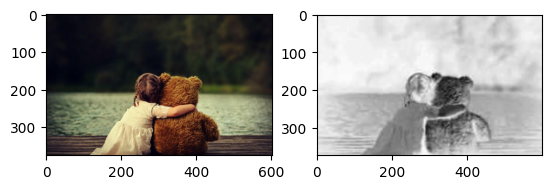

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf

# 그림을 두개 그려야 해요
# 왼쪽은 원본 이미지 출력
# 오른쪽은 원본에서 특징을 추출한 Feature Map
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

origin_img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/girl-teddy-color.jpg')
img_ori.imshow(origin_img)

origin_img.shape
# 원본 이미지의 shape => (429, 640, 3)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1,429, 640, 3)

input_image = origin_img.reshape((1,) + origin_img.shape)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# filter를 준비해야해요
# (3,3,3,1) => (filter의 height, width, filter의 channel, filter의 개수)
# 차원은 끝에서 부터 하나씩 만들어 가면 됨
filter = np.array([[[[-1], [0], [1]],[[-1], [0], [1]],[[-1], [0], [1]]],
                   [[[-1], [0], [1]],[[-1], [0], [1]],[[-1], [0], [1]]],
                   [[[-1], [0], [1]],[[-1], [0], [1]],[[-1], [0], [1]]]])

# strides => 1로 설정
# padding은 사용하지 않습니다(VALID)
conv2d = tf.nn.conv2d(input_image,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_result = conv2d.numpy()

# featur map의 shape을 알아보아요
conv2d_result.shape

t_img = conv2d_result[0,:,:,:]  # 3차원으로 변경됨
img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

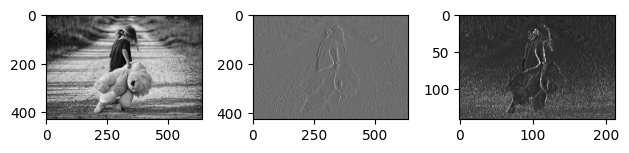

In [ ]:
# 흑백 이미지를 가지고 1 channel을 사용해서 convolution
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf

# 그림을 개 그려야 해요
# 왼쪽은 원본 이미지 출력
# 가운데는 원본에서 특징을 추출한 Feature Map 출력
# 오른쪽은 Feature Map의 pooling 처리를 한 결과 출
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

origin_img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/girl-teddy.jpg')
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1,429, 640, 3)

input_image = origin_img.reshape((1,) + origin_img.shape)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력 이미지의 형태(shape) => (1,429,640,3)
# 입력 이미지의 channel을 변경해서 입력이미지의 형태를
# (1,429,640,3) 이 형태로 변환할 거에요!
channel_1_input_image = input_image[:,:,:,0:1]  # 0:1 대신 0 사용하면 차원이 줄어들어서 안됨!!
channel_1_input_image.shape  # (1, 429, 640, 1)

# filter를 준비해야해요
# (3,3,1,1) => (filter의 height, width, filter의 channel, filter의 개수)
# 차원은 끝에서 부터 하나씩 만들어 가면 됨
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])

# strides => 1로 설정
# padding은 사용하지 않습니다(VALID)
conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_result = conv2d.numpy()

# featur map의 shape을 알아보아요
conv2d_result.shape

t_img = conv2d_result[0,:,:,:]  # 3차원으로 변경됨
ax2.imshow(t_img, cmap='gray')

# 이번에는 추가적으로 pooling처리를 더 해보아요!
# pooling은 kernel의 크기만 우리가 설정하면 되요
# 자동적으로 strides는 kernel의 크기에 따라 설정되요!
# 사용하는 kernel 크기는 3x3으로 할거에요!
pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],  # 4차원이기 때문에 이렇게 표시, 앞뒤 1 붙은건 의미 없음(4차원으로 만들기 위해 한거)
                      strides=[1,3,3,1],
                      padding='VALID')

pool_result = pool.numpy()  # 넘파이 array로 받기 위해서

p_img = pool_result[0,:,:,:]  # 3차원으로 변경됨
ax3.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()

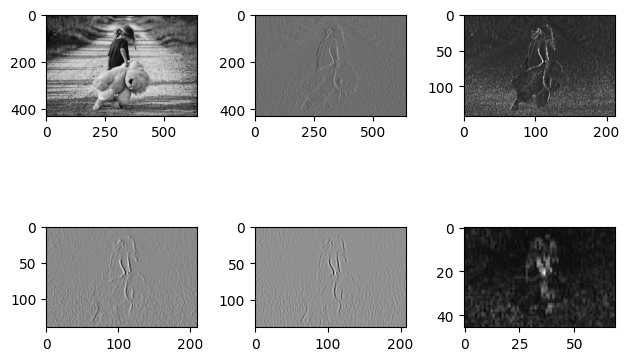

In [ ]:
# 위의 그림은 원본이미지를 가지고
# convolution 1번, pooling 1번을 수행한 결과를 출력한 그림이에요!

# pooling한 결과에 convolution을 연속으로 2번 수행하고
# 마지막으로 pooling을 1번 더 수행해서 그 결과를 그림으로 출력

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf

# 그림을 6개 그려야 해요
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

origin_img = img.imread('/content/drive/MyDrive/AI스쿨 파일/ML/girl-teddy.jpg')
ax1.imshow(origin_img)

# 입력데이터는 4차원으로 표현되어야 해요!
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)도
# 입력을 4차원으로 받아요!
# (이미지개수, height, width, color)
# (1,429, 640, 3)

input_image = origin_img.reshape((1,) + origin_img.shape)

# 픽셀값을 정수에서 실수로 변환해요!
input_image = input_image.astype(np.float32)

# 입력 이미지의 형태(shape) => (1,429,640,3)
# 입력 이미지의 channel을 변경해서 입력이미지의 형태를
# (1,429,640,3) 이 형태로 변환할 거에요!
channel_1_input_image = input_image[:,:,:,0:1]  # 0:1 대신 0 사용하면 차원이 줄어들어서 안됨!!
channel_1_input_image.shape  # (1, 429, 640, 1)

# filter를 준비해야해요
# (3,3,1,1) => (filter의 height, width, filter의 channel, filter의 개수)
# 차원은 끝에서 부터 하나씩 만들어 가면 됨
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])

# strides => 1로 설정
# padding은 사용하지 않습니다(VALID)
conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_result = conv2d.numpy()

# featur map의 shape을 알아보아요
conv2d_result.shape

t_img = conv2d_result[0,:,:,:]  # 3차원으로 변경됨
ax2.imshow(t_img, cmap='gray')

# 이번에는 추가적으로 pooling처리를 더 해보아요!
# pooling은 kernel의 크기만 우리가 설정하면 되요
# 자동적으로 strides는 kernel의 크기에 따라 설정되요!
# 사용하는 kernel 크기는 3x3으로 할거에요!
pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],  # 4차원이기 때문에 이렇게 표시, 앞뒤 1 붙은건 의미 없음(4차원으로 만들기 위해 한거)
                      strides=[1,3,3,1],
                      padding='VALID')

pool_result = pool.numpy()  # 넘파이 array로 받기 위해서

p_img = pool_result[0,:,:,:]  # 3차원으로 변경됨
ax3.imshow(p_img, cmap='gray')

# conv 2번, pooling 1번 추가
conv2d_1 = tf.nn.conv2d(pool_result,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_1_result = conv2d_1.numpy()
t1_img = conv2d_1_result[0,:,:,:]
ax4.imshow(t1_img,
           cmap='gray')

conv2d_2 = tf.nn.conv2d(conv2d_1_result,
                      filter,
                      strides=[1,1,1,1],  # 원래는 1이지만 4차원 형식 맞춰주기 위해서 이렇게 씀
                      padding='VALID')
conv2d_2_result = conv2d_2.numpy()
t2_img = conv2d_2_result[0,:,:,:]
ax5.imshow(t2_img,
           cmap='gray')

pool2 = tf.nn.max_pool(conv2d_2_result,
                      ksize=[1,3,3,1],  # 4차원이기 때문에 이렇게 표시, 앞뒤 1 붙은건 의미 없음(4차원으로 만들기 위해 한거)
                      strides=[1,3,3,1],
                      padding='VALID')
pool2_result = pool2.numpy()
p2_img = pool2_result[0,:,:,:]
ax6.imshow(p2_img,
           cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
#MNIST 데이터를 이용해서
# CNN 구현을 해보아요!

# 필요 module import
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Raw Data Loading
# csv에 담겨있다는 것 -> 2차원 데이터
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

# 결측치 없고, 이상치 없어요
# feature engineering도 그닥 할게 없어요

# 독립변수와 종속변수 분리
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [ ]:
# CNN Model을 만들면 되요!
# input_layer는 Conv2D에 포함시켜 생성
model = Sequential()

model.add(Conv2D(filters=32,  # filter 개수
                 kernel_size=(3,3),  # filter 크기(튜플 형태로 줘야함)
                 strides=(1,1),  # strides는 1 의미
                 activation='relu',
                 input_shape=(28,28,1)))  # 하나의 이미지이기 때문에 3차원으로 변경해서
                                          # 3이 아닌 1 넣은 이유! -> shape 맞추기 위해 28*28*1 = 784

model.add(MaxPooling2D(pool_size=(2,2)))

# 두번째이므로 input_shape 필요없
# 이미지의 크기가 줄어들기 때문
# 필터 개수는 늘어남
# 작아진 이미지에서 더 많은 특징들을 잡아내겠다는 의미
# conv 계속할 수록 filter는 늘어남
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.summary()  # 이걸 통해 모델 확인하면서 진행
                 # 여기서 conv 한번 더하면 1,1이 되는데 데이터가 담길리가 없으므로 !!

# 그 다음은 학습에 관련된 DNN이 나오면 되요

model.add(Flatten())  # 데이터를 1차원으로 평평하게 피세요!

# hidden layer
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
Total params: 92672 (362.00 KB)
Trainable params: 92672 

In [ ]:
history = model.fit(x_data_train_norm.reshape(-1,28,28,1),
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/100
206/206 [==============================] - 7s 9ms/step - loss: 0.3444 - acc: 0.8946 - val_loss: 0.1313 - val_acc: 0.9574
Epoch 2/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0759 - acc: 0.9758 - val_loss: 0.0764 - val_acc: 0.9731
Epoch 3/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0534 - acc: 0.9832 - val_loss: 0.0635 - val_acc: 0.9790
Epoch 4/100
206/206 [==============================] - 1s 5ms/step - loss: 0.0391 - acc: 0.9882 - val_loss: 0.0479 - val_acc: 0.9848
Epoch 5/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0263 - acc: 0.9914 - val_loss: 0.0679 - val_acc: 0.9800
Epoch 6/100
206/206 [==============================] - 1s 6ms/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0354 - val_acc: 0.9885
Epoch 7/100
206/206 [==============================] - 1s 5ms/step - loss: 0.0154 - acc: 0.9953 - val_loss: 0.0468 - val_acc: 0.9875
Epoch 8/100
206/206 [==============================] - 1s 7ms/step - 

394/394 [==============================] - 1s 3ms/step - loss: 0.1005 - acc: 0.9898
[0.10050322115421295, 0.9897618889808655]


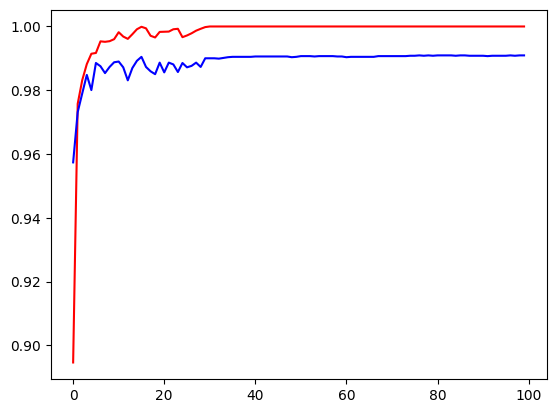

In [ ]:
# evaluation
print(model.evaluate(x_data_test_norm.reshape(-1,28,28,1),
                     t_data_test))

# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')

plt.show()